### Data Analytics Student: Sarah Freeman

This notebook file displays the final data analtyics project. The goal was to see what variable can be a good predictor for readmission rate.

In [101]:
# import libraries for the 

import numpy as np
import pandas as pd
import scipy.stats

from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

## <font color='Red'>Initial Data Setup</font> 


### Seting up packages

In [69]:
#importing data
#ETL process was performed prior

df = pd.read_csv("https://raw.githubusercontent.com/Sarahjfreeman/DataAnalyticsPortfolio/DiabetesData/csv_diabetic_data_cleaned.csv")

### Loading the data

In [70]:
#plotting
import matplotlib.pyplot as plt
import seaborn as sns


#linear algebra
import numpy as np

#data processing
import pandas as pd

#splitting data
from sklearn.model_selection import train_test_split

#scaling
from sklearn.preprocessing import StandardScaler

#tuning
from sklearn.model_selection import RandomizedSearchCV

#model evaluation
from sklearn import metrics

### Data Characteristics

In [71]:
#view our columns

df.head()

,ethnicity/race,sex,age,admission_type_id,discharge_disposition_id,admission_source_id,LOS,payer_code,medical_specialty,num_lab_procedures,...,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,metformin,insulin,diabetes_med,diabetes_med_change,readmitted
0,African American,Male,[70-80),6,25,1,4,0,Allergy and Immunology,11,...,0,0,0,5,None,No,No,Yes,Yes,>30
1,African American,Female,[40-50),3,1,2,1,0,Anesthesiology,37,...,0,0,0,8,None,No,Steady,Yes,Yes,No
2,African American,Female,[10-20),2,1,4,4,0,Anesthesiology-Pediatric,61,...,0,0,1,3,None,No,Down,Yes,No,>30
3,African American,Male,[10-20),2,1,4,3,0,Anesthesiology-Pediatric,57,...,0,0,0,4,None,No,No,Yes,Yes,No
4,African American,Female,[10-20),2,6,1,2,0,Anesthesiology-Pediatric,64,...,0,0,3,3,None,No,No,Yes,No,>30


In [72]:
#lets take a look at the data types in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ethnicity/race            101766 non-null  object
 1   sex                       101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   LOS                       101766 non-null  int64 
 7   payer_code                101766 non-null  object
 8   medical_specialty         101766 non-null  object
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

## <font color='Red'>Data Cleansing</font> 


In [73]:
# delete not needed columns

del df['payer_code']

In [74]:
# check

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ethnicity/race            101766 non-null  object
 1   sex                       101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   LOS                       101766 non-null  int64 
 7   medical_specialty         101766 non-null  object
 8   num_lab_procedures        101766 non-null  int64 
 9   num_procedures            101766 non-null  int64 
 10  num_medications           101766 non-null  int64 
 11  number_outpatient         101766 non-null  int64 
 12  number_emergency          101766 non-null  int64 
 13  number_inpatient          101766 non-null  int64 
 14  numb

In [75]:
#looking at the stats breakdown

df.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,LOS,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [97]:
#isolating columns and defining them as variables
ethnicity=df.iloc[:,0]
sex=df.iloc[:,1]
age=df.iloc[:,2]
admissions_type_id=df.iloc[:,3]
discharge_disposition_id=df.iloc[:,4]
admission_source_id=df.iloc[:,5]
LOS=df.iloc[:,6]
medical_speciality=df.iloc[:,7]
num_lab_procedures =df.iloc[:,8]
num_procedures=df.iloc[:,9]         
num_medications=df.iloc[:,10]
number_outpatient=df.iloc[:,11]
number_emergency=df.iloc[:,12]
number_inpatient=df.iloc[:,13]
number_diagnoses=df.iloc[:,14]    
max_glucose=df.iloc[:,15]
metform=df.iloc[:,16]
insulin=df.iloc[:,17]
diabetes_med=df.iloc[:,18]
diabetes_med_change=df.iloc[:,19]
readmitted=df.iloc[:,20]

In [76]:
#convert string

#ethnicity/race
df['ethnicity/race'] = df['ethnicity/race'].map({
    'Caucasian':int(5),
    'African American':int(4), 
    'Hispanic':int(3),
    'Asian':int(2), 
    'Other':int(1), 
    'Null':int(0)})

#sex
df['sex'] = df['sex'].map({
    'Male' :int(2),
    'Female' :int(1),
    'Unknown/Invalid' :int(0),})

#age
df['age'] = df['age'].map({
    '[90-100)':int(9),
    '[80-90)':int(8), 
    '[70-80)':int(7),
    '[60-70)':int(6), 
    '[50-60)':int(5),
    '[40-50)':int(4),
    '[30-40)':int(3), 
    '[20-30)':int(2),
    '[10-20)':int(1), 
    '[0-10)':int(0)})

#medical_specialty
df['medical_specialty'] = df['medical_specialty'].map({
'Allergy and Immunology':int(71),
'Anesthesiology':int(70),
'Anesthesiology-Pediatric':int(69),
'Cardiology':int(68),
'Cardiology-Pediatric':int(67),
'DCPTEAM':int(66),
'Dentistry':int(65),
'Dermatology':int(64),
'Emergency/Trauma':int(63),
'Endocrinology':int(62),
'Endocrinology-Metabolism':int(61),
'Family/General Practice':int(60),
'Gastroenterology':int(59),
'Gynecology':int(58),
'Hematology':int(57),
'Hematology/Oncology':int(56),
'Hospitalist':int(55),
'Infectious Diseases':int(54),
'Internal Medicine':int(53),
'Nephrology':int(52),
'Neurology':int(51),
'Neurophysiology':int(50),
'Obsterics & Gynecology-Gynecologic Onco':int(49),
'Obstetrics':int(48),
'Obstetrics and Gynecology':int(47),
'Oncology':int(46),
'Ophthalmology':int(45),
'Orthopedics':int(44),
'Orthopedics-Reconstructive':int(43),
'Osteopath':int(42),
'Otolaryngology':int(41),
'Outreach Services':int(40),
'Pathology':int(39),
'Pediatrics':int(38),
'Pediatrics-Allergy and Immunology':int(37),
'Pediatrics-Critical Care':int(36),
'Pediatrics-Emergency Medicine':int(35),
'Pediatrics-Endocrinology':int(34),
'Pediatrics-Hematology-Oncology':int(33),
'Pediatrics-Infectious Diseases':int(32),
'Pediatrics-Neurology':int(31),
'Pediatrics-Pulmonology':int(30),
'Perinatology':int(),
'Physical Medicine and Rehabilitation':int(29),
'Podiatry':int(28),
'Proctology':int(27),
'Psychiatry':int(26),
'Psychiatry-Addictive':int(25),
'Psychiatry-Child/Adolescent':int(24),
'Psychsology':int(23),
'Pulmonology':int(22),
'Radiologist':int(21),
'Radiology':int(20),
'Resident':int(19),
'Rheumatology':int(18),
'Speeches':int(17),
'Sports Medicine':int(16),
'Surgeon':int(15),
'Surgery-Cardiovascular':int(14),
'Surgery-Cardiovascular/Thoracic':int(13),
'Surgery-Colon & Rectal':int(12),
'Surgery-General':int(11),
'Surgery-Maxillofacial':int(10),
'Surgery-Neuro':int(9),
'Surgery-Pediatric':int(8),
'Surgery-Plastic':int(7),
'Surgery-Plastic within Head and Neck':int(6),
'Surgery-Thoracic':int(5),
'Surgery-Vascular':int(4),
'Surgical Specialty':int(3),
'Urology':int(2),
'PhysicianNotFound':int(1),
'Null' :int(0),})

#max_glu_serum
df['max_glu_serum'] = df['max_glu_serum'].map({
    '>300' :int(3),
    '>200' :int(2),
    'Norm':int(1),
    'None' :int(0),})

#diabetes med
df['diabetes_med'] = df['diabetes_med'].map({
    'Yes':int(1), 
    'No':int(0)})

#diabetes med change
df['diabetes_med_change'] = df['diabetes_med_change'].map({
    'Yes':int(1), 
    'No':int(0)})

# metformin
df['metformin'] = df['metformin'].map({
    'Down' :int(3),
    'Up' :int(2),
    'Steaddy' :int(1),
    'Up' :int(0),})

# insulin
df['insulin'] = df['insulin'].map({
    'Down' :int(3),
    'Up' :int(2),
    'Steaddy' :int(1),
    'Up' :int(0),})

#readmitted
df['readmitted'] = df['readmitted'].map({
    '<30' :int(2),
    '>30' :int(1),
    'No' :int(0),})

In [77]:
# confirm the changes made

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ethnicity/race            101766 non-null  int64  
 1   sex                       101763 non-null  float64
 2   age                       101766 non-null  int64  
 3   admission_type_id         101766 non-null  int64  
 4   discharge_disposition_id  101766 non-null  int64  
 5   admission_source_id       101766 non-null  int64  
 6   LOS                       101766 non-null  int64  
 7   medical_specialty         101664 non-null  float64
 8   num_lab_procedures        101766 non-null  int64  
 9   num_procedures            101766 non-null  int64  
 10  num_medications           101766 non-null  int64  
 11  number_outpatient         101766 non-null  int64  
 12  number_emergency          101766 non-null  int64  
 13  number_inpatient          101766 non-null  i

In [78]:
# convert medical_specialty to int64

df['medical_specialty'] = df['medical_specialty'].fillna(0).astype(np.int64)
df['sex'] = df['sex'].fillna(0).astype(np.int64)
df['metformin'] = df['metformin'].fillna(0).astype(np.int64)
df['insulin'] = df['insulin'].fillna(0).astype(np.int64)

In [79]:
# confirm medical_specialty change

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   ethnicity/race            101766 non-null  int64
 1   sex                       101766 non-null  int64
 2   age                       101766 non-null  int64
 3   admission_type_id         101766 non-null  int64
 4   discharge_disposition_id  101766 non-null  int64
 5   admission_source_id       101766 non-null  int64
 6   LOS                       101766 non-null  int64
 7   medical_specialty         101766 non-null  int64
 8   num_lab_procedures        101766 non-null  int64
 9   num_procedures            101766 non-null  int64
 10  num_medications           101766 non-null  int64
 11  number_outpatient         101766 non-null  int64
 12  number_emergency          101766 non-null  int64
 13  number_inpatient          101766 non-null  int64
 14  number_diagnoses    

In [80]:
df.head()

,ethnicity/race,sex,age,admission_type_id,discharge_disposition_id,admission_source_id,LOS,medical_specialty,num_lab_procedures,num_procedures,...,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,metformin,insulin,diabetes_med,diabetes_med_change,readmitted
0,4,2,7,6,25,1,4,71,11,1,...,0,0,0,5,0,0,0,1,1,1
1,4,1,4,3,1,2,1,70,37,1,...,0,0,0,8,0,0,0,1,1,0
2,4,1,1,2,1,4,4,69,61,0,...,0,0,1,3,0,0,3,1,0,1
3,4,2,1,2,1,4,3,69,57,0,...,0,0,0,4,0,0,0,1,1,0
4,4,1,1,2,6,1,2,69,64,0,...,0,0,3,3,0,0,0,1,0,1


In [81]:
# there are some null values, lets convert those to 0

df=df.replace(to_replace='Null',value=0)

In [98]:
# confirm 

df.head()

,ethnicity/race,sex,age,admission_type_id,discharge_disposition_id,admission_source_id,LOS,medical_specialty,num_lab_procedures,num_procedures,...,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,metformin,insulin,diabetes_med,diabetes_med_change,readmitted
0,4,2,7,6,25,1,4,71,11,1,...,0,0,0,5,0,0,0,1,1,1
1,4,1,4,3,1,2,1,70,37,1,...,0,0,0,8,0,0,0,1,1,0
2,4,1,1,2,1,4,4,69,61,0,...,0,0,1,3,0,0,3,1,0,1
3,4,2,1,2,1,4,3,69,57,0,...,0,0,0,4,0,0,0,1,1,0
4,4,1,1,2,6,1,2,69,64,0,...,0,0,3,3,0,0,0,1,0,1


## <font color='Red'>Intial Analysis</font> 

### Summary Statistics


In [128]:
# Calculate summary statistics
summary = df.describe()

In [129]:
# Transpose statistics to get similar format as R summary() function

summary = summary.transpose()

In [133]:
# Visualize summary statistics in console

summary.head(30)

,count,mean,std,min,25%,50%,75%,max
ethnicity/race,101766.0,4.581432,0.972368,0.0,4.0,5.0,5.0,5.0
sex,101766.0,1.462355,0.498642,0.0,1.0,1.0,2.0,2.0
age,101766.0,6.096702,1.594084,0.0,5.0,6.0,7.0,9.0
admission_type_id,101766.0,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
LOS,101766.0,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0
medical_specialty,101766.0,25.105458,27.767079,0.0,0.0,4.0,53.0,71.0
num_lab_procedures,101766.0,43.095641,19.674362,1.0,31.0,44.0,57.0,132.0
num_procedures,101766.0,1.339730,1.705807,0.0,0.0,1.0,2.0,6.0


### T-Test Setup

In [ ]:
number_meds=df.iloc[:,12]
race_eth=df.iloc[:,0]
age=df.iloc[:,2]
LOS=df.iloc[:,7]
readmissions=df.iloc[:,22]
discharge_disposition=df.iloc[:,4]

In [ ]:
#race/ethnicity
race_eth2=race_eth.replace({
    "African American":int(1),
    "Asian":int(2),
    "Caucasian":int(3),
    "Hispanic":int(4),
    "Null":int(5),
    "Other":int(6),
})

T-tests help determine whether there is a significant difference between the groups or if the groups are similar. Through this we can interpret if the two columns are correleated. The null hypothesis in the case of this dataset is that there is no difference or correlation between the two groups. For this dataset the p-value came out to zero for all of the value comparisons, so we reject the null hypothesis, concluding that there is significant differences and no correlation for each of the variables.

### Variable 1: Number of Medications

#### As compared to ethnicity/race

In [ ]:
stats.ttest_ind(number_meds,race_eth2)

```Ttest_indResult(statistic=518.2632769123827, pvalue=0.0)```

#### As compared to age

In [ ]:
stats.ttest_ind(number_meds,age2)

```Ttest_indResult(statistic=343.7631978806828, pvalue=0.0)```

### Variable 2: Length of Stay

#### As compared to ethnicity/race

In [ ]:
stats.ttest_ind(LOS,race_eth2)

```Ttest_indResult(statistic=169.91304837415873, pvalue=0.0)```

#### As compared to age

In [ ]:
stats.ttest_ind(LOS,age2)

```Ttest_indResult(statistic=-254.58923700359645, pvalue=0.0)```

### Variable 3: Readmission Rates

#### As compared to ethnicity/race

In [ ]:
stats.ttest_ind(readmissions2,race_eth2)

```Ttest_indResult(statistic=-127.99217334121776, pvalue=0.0)```

#### As compared to age

In [ ]:
stats.ttest_ind(readmissions2,age2)

```Ttest_indResult(statistic=-849.7343551871595, pvalue=0.0)```

#### As compared to discharge disposition

In [ ]:
stats.ttest_ind(readmissions2,discharge_disposition)

```Ttest_indResult(statistic=-90.80574716134892, pvalue=0.0)```

## <font color='Red'>Linear Regression</font> 


In [111]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression

### Variable 1: Number of Medications

#### As compared to ethnicity/race

In [ ]:
X=np.array([number_meds]).reshape((-1,1))
y=np.array([race_eth2]).reshape((-1,1))

In [ ]:
model = LinearRegression().fit(X, y)

In [ ]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

```coefficient of determination: 0.0005132333878352657```

In [ ]:
print('intercept:', model.intercept_)

```intercept: [2.68222071]```

In [ ]:
print('slope:', model.coef_)

```slope: [[0.00268579]]```

In [ ]:
y_pred = model.predict(X)
print('predicted response:', y_pred, sep='\n')

```predicted response:
[[2.72787917]
 [2.74667972]
 [2.70639284]
 ...
 [2.70639284]
 [2.73056496]
 [2.69296388]]```

#### As compared to age

In [ ]:
y2=np.array([age2]).reshape((-1,1))

In [ ]:
model2 = LinearRegression().fit(X, y2)

In [ ]:
r_sq2 = model2.score(X, y2)
print('coefficient of determination:', r_sq2)

```coefficient of determination: 0.0017511737644607672
```

In [ ]:
print('intercept:', model2.intercept_)

```intercept: [6.96520163]
```

In [ ]:
print('slope:', model2.coef_)

```slope: [[0.00820758]]```

In [ ]:
y2_pred = model2.predict(X)
print('predicted response:', y2_pred, sep='\n')

```predicted response:
[[7.10473053]
 [7.16218361]
 [7.03906987]
 ...
 [7.03906987]
 [7.11293811]
 [6.99803196]]```

### Variable 2: Length of Stay

#### As compared to race/ethnicty

In [ ]:
X2=np.array([LOS]).reshape((-1,1))

In [ ]:
model3 = LinearRegression().fit(X2, y)

In [ ]:
r_sq3 = model3.score(X2, y)
print('coefficient of determination:', r_sq3)

```coefficient of determination: 0.0003876686533235141
```

In [ ]:
print('intercept:', model3.intercept_)

```intercept: [2.75319049]
   ```

In [ ]:
print('slope:', model3.coef_)

```slope: [[-0.00635544]]```

In [ ]:
y3_pred = model3.predict(X2)
print('predicted response:', y3_pred, sep='\n')

```
y3_pred = model3.predict(X2)
print('predicted response:', y3_pred, sep='\n')
predicted response:
[[2.72776872]
 [2.74683505]
 [2.72776872]
 ...
 [2.72776872]
 [2.74683505]
 [2.73412416]]```

#### As compared to age

In [ ]:
model4 = LinearRegression().fit(X2, y2)

In [ ]:
r_sq4 = model4.score(X2, y2)
print('coefficient of determination:', r_sq4)

```coefficient of determination: 0.011559457021110608
```

In [ ]:
print('intercept:', model4.intercept_)

```intercept: [6.84430986]
```

In [ ]:
print('slope:', model4.coef_)

```slope: [[0.05741427]]
```

In [ ]:
y4_pred = model4.predict(X2)
print('predicted response:', y4_pred, sep='\n')

```predicted response:
[[7.07396694]
 [6.90172413]
 [7.07396694]
 ...
 [7.07396694]
 [6.90172413]
 [7.01655267]]```

### Variable 3: Readmissions

#### As compared to race/ethnicty

In [ ]:
X3=np.array([readmissions2]).reshape((-1,1))

In [ ]:
model5 = LinearRegression().fit(X3, y)

In [ ]:
r_sq5 = model5.score(X3, y)
print('coefficient of determination:', r_sq5)

```coefficient of determination: 0.00025507829840432095
```

In [ ]:
print('intercept:', model5.intercept_)

```intercept: [2.68875063]
```

In [ ]:
print('slope:', model5.coef_)

```slope: [[0.01666855]]
```

In [ ]:
y5_pred = model5.predict(X3)
print('predicted response:', y5_pred, sep='\n')

```predicted response:
[[2.70541918]
 [2.73875628]
 [2.70541918]
 ...
 [2.73875628]
 [2.73875628]
 [2.70541918]]```

#### As compared to age

In [ ]:
model6 = LinearRegression().fit(X3, y2)

In [ ]:
r_sq6 = model6.score(X3, y2)
print('coefficient of determination:', r_sq6)

```coefficient of determination: 0.0007190859847027165
```

In [ ]:
print('intercept:', model6.intercept_)
print('slope:', model6.coef_)

```intercept: [7.19809317]
slope: [[-0.04630067]]```

In [ ]:
y6_pred = model6.predict(X3)
print('predicted response:', y6_pred, sep='\n')

```y6_pred = model6.predict(X3)
print('predicted response:', y6_pred, sep='\n')
predicted response:
[[7.1517925 ]
 [7.05919117]
 [7.1517925 ]
 ...
 [7.05919117]
 [7.05919117]
 [7.1517925 ]]```

#### As compared to discharge disposition

In [ ]:
y3=np.array([discharge_disposition]).reshape((-1,1))

In [ ]:
model7 = LinearRegression().fit(X3, y3)

In [ ]:
r_sq7 = model6.score(X3, y3)
print('coefficient of determination:', r_sq7)

```coefficient of determination: -0.41011004132757023
```

In [ ]:
print('intercept:', model7.intercept_)
print('slope:', model7.coef_)

```intercept: [3.70401577]
slope: [[0.00530907]]```

In [ ]:
y7_pred = model7.predict(X3)
print('predicted response:', y7_pred, sep='\n')

```predicted response:
[[3.70932484]
 [3.71994297]
 [3.70932484]
 ...
 [3.71994297]
 [3.71994297]
 [3.70932484]]```

## <font color='Red'>Correlations</font> 


### Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. 

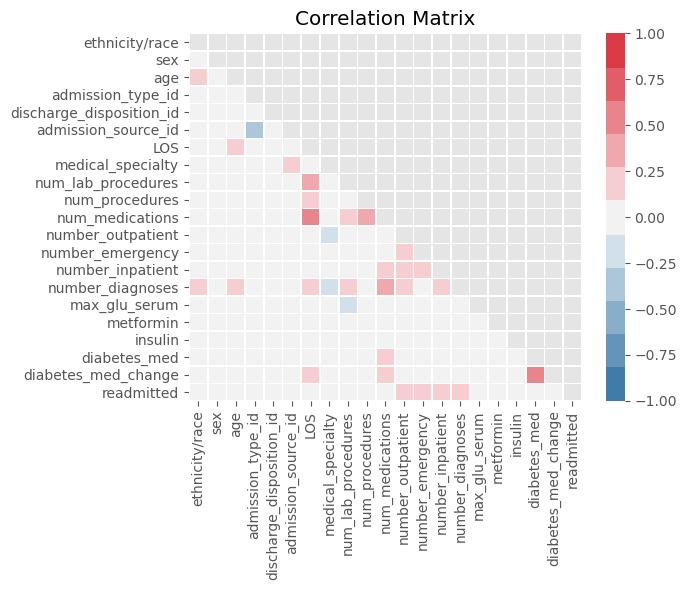

In [229]:
corr = df.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(7, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=11)
                                 

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

plt.title('Correlation Matrix')

fig.tight_layout()

### Correlation Test

### Pearson's Test

#### Readmission per Length of Stay

In [120]:
df.corr(method='pearson', min_periods=1)

,ethnicity/race,sex,age,admission_type_id,discharge_disposition_id,admission_source_id,LOS,medical_specialty,num_lab_procedures,num_procedures,...,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,metformin,insulin,diabetes_med,diabetes_med_change,readmitted
ethnicity/race,1.000000,0.013162,0.091595,-0.004876,-0.001900,-0.006898,0.006562,-0.032483,-0.014216,0.012892,...,0.045695,0.003758,0.031718,0.096518,0.030045,0.001305,0.000779,-0.018053,-0.012095,0.043172
sex,0.013162,1.000000,-0.050600,0.000320,-0.005253,0.000733,-0.029866,-0.014482,-0.003021,0.059843,...,-0.011430,-0.021043,-0.014554,-0.003277,-0.002650,-0.000487,0.005999,0.015945,0.014832,-0.014385
age,0.091595,-0.050600,1.000000,0.009062,0.005788,-0.011324,0.107515,-0.019322,0.020770,-0.030104,...,0.023724,-0.087291,-0.042861,0.242597,0.020515,-0.002270,0.001944,-0.022601,-0.036019,0.030271
admission_type_id,-0.004876,0.000320,0.009062,1.000000,0.083483,0.106654,-0.009186,0.132030,0.022611,0.000877,...,-0.008553,0.005887,-0.004574,-0.004361,-0.000435,0.005823,-0.004650,0.005732,0.001983,-0.000503
discharge_disposition_id,-0.001900,-0.005253,0.005788,0.083483,1.000000,0.018193,-0.006651,0.128057,0.000038,-0.014640,...,-0.006192,0.009584,-0.002638,-0.000394,0.006655,0.003364,-0.005724,0.003061,0.005103,-0.000421
admission_source_id,-0.006898,0.000733,-0.011324,0.106654,0.018193,1.000000,-0.007749,0.180059,0.009059,0.000288,...,-0.025961,-0.000050,0.002965,-0.031417,0.002505,-0.006768,0.026968,0.004028,-0.000353,-0.004385
LOS,0.006562,-0.029866,0.107515,-0.009186,-0.006651,-0.007749,1.000000,-0.019470,0.318450,0.191472,...,-0.008916,-0.009681,0.073623,0.220186,0.028233,-0.000777,0.002469,0.062520,0.109173,0.057718
medical_specialty,-0.032483,-0.014482,-0.019322,0.132030,0.128057,0.180059,-0.019470,1.000000,0.030711,0.029260,...,-0.096006,0.013993,0.003784,-0.108693,0.008998,0.003208,-0.074021,0.025752,0.011943,-0.018906
num_lab_procedures,-0.014216,-0.003021,0.020770,0.022611,0.000038,0.009059,0.318450,0.030711,1.000000,0.058066,...,-0.007602,-0.002279,0.039231,0.152773,-0.128376,0.000793,-0.006890,0.033107,0.063958,0.037976
num_procedures,0.012892,0.059843,-0.030104,0.000877,-0.014640,0.000288,0.191472,0.029260,0.058066,1.000000,...,-0.024819,-0.038179,-0.066236,0.073734,-0.069278,-0.003946,0.008156,-0.006821,0.004448,-0.038235


In [115]:
scipy.stats.pearsonr(df.LOS,df.readmitted)

(0.05771827472814491, 7.87344598562159e-76)

#### Number of Diagnoses per Number of Procedures

In [123]:
scipy.stats.pearsonr(df.num_lab_procedures,df.num_medications)

(0.26816062516987405, 0.0)

### Spearman's Test

In [122]:
scipy.stats.spearmanr(df.LOS,df.readmitted)

SpearmanrResult(correlation=0.06666365725318307, pvalue=1.4157628646176474e-100)

In [124]:
scipy.stats.spearmanr(df.num_lab_procedures,df.num_medications)

SpearmanrResult(correlation=0.2516335955696946, pvalue=0.0)

### Correlation Visuals

Text(0, 0.5, 'Readmitted')

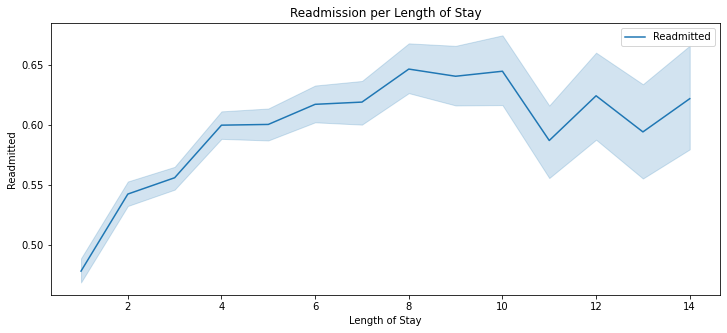

In [125]:
# set figure size
plt.figure( figsize = ( 12, 5))
  
# plot a simple time series plot
# using seaborn.lineplot()
import seaborn as sns

sns.lineplot( x = df['LOS'],
             y = df['readmitted'],
             data = df,
             label = 'Readmitted')

plt.title('Readmission per Length of Stay')  
plt.xlabel( 'Length of Stay')
plt.ylabel( 'Readmitted')

Text(0, 0.5, 'Number of Lab Procedures')

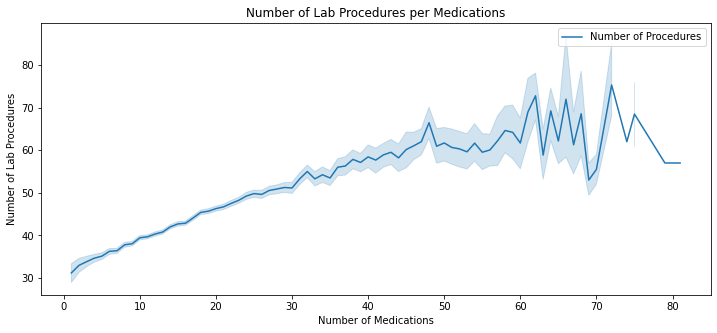

In [126]:
# set figure size
plt.figure( figsize = ( 12, 5))
  
# plot a simple time series plot
# using seaborn.lineplot()
import seaborn as sns

sns.lineplot( x = df['num_medications'],
             y = df['num_lab_procedures'],
             data = df,
             label = 'Number of Procedures')

plt.title('Number of Lab Procedures per Medications')  
plt.xlabel( 'Number of Medications')
plt.ylabel( 'Number of Lab Procedures')

## <font color='Red'>Multilinear Regression Analysis</font> 

In this test, we are trying to determine the length of stay (y) using number of procedures and number of diagnoses (X). Our number of procedures and number of diagnoses are our independent variables while length of stay represents our dependent variable that is affected by our independent values.

For our first test, we are performing a coefficient test. The coefficient is a factor that describes the relationship with an unknown variable. In this case, we can ask for the coefficient value of weight against length of stay, and for number of diagnoses against length of stay. The results tells us what would happen if we increase, or decrease, one of the independent values.

In [231]:
from sklearn import linear_model

X_multi = df[['num_lab_procedures','num_medications']]
y_multi = df['LOS']

regr = linear_model.LinearRegression()
regr.fit(X_multi, y_multi)

print(regr.coef_)

[0.03162571 0.15067373]


### Results Explained

The result array represents the coefficient values of number of procedures and number of diagnoses.

Number of Procedures: 0.03162571
Number of Diagnoses: 0.15067373

These values tell us that if the number of procedures increase by 1, the length of stay increases by 0.3083346 days or roughly 45 minutes and if the number of diagnoses increases by 1, the length of stay increases by 0.31986903 days or about 3 and half hours.

### Sample, we will try to find the length of stay of Patient A if he had 7 lab procedures and takes 2 medications. 

In [242]:
X_multi = df[['num_lab_procedures','num_medications']]
y_multi = df['LOS']

regr = linear_model.LinearRegression()
regr.fit(X, y)

predictedLOS_patientA = regr.predict([[7,2]])

print(predictedLOS_patientA)

[4.40671988]


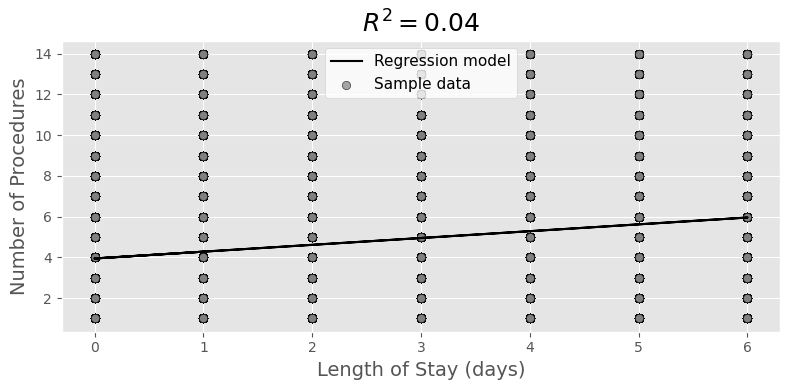

In [185]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_multi, response, color='k', label='Regression model')
ax.scatter(X_multi, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Number of Procedures', fontsize=14)
ax.set_xlabel('Length of Stay (days)', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

## <font color='Red'>Machine Learning</font> 


## Splitting up the data
#### Creating a trainning and test data set

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   ethnicity/race            101766 non-null  int64
 1   sex                       101766 non-null  int64
 2   age                       101766 non-null  int64
 3   admission_type_id         101766 non-null  int64
 4   discharge_disposition_id  101766 non-null  int64
 5   admission_source_id       101766 non-null  int64
 6   LOS                       101766 non-null  int64
 7   medical_specialty         101766 non-null  int64
 8   num_lab_procedures        101766 non-null  int64
 9   num_procedures            101766 non-null  int64
 10  num_medications           101766 non-null  int64
 11  number_outpatient         101766 non-null  int64
 12  number_emergency          101766 non-null  int64
 13  number_inpatient          101766 non-null  int64
 14  number_diagnoses    

#### Drop unneeded variables

In [82]:
df_model = df.drop(['metformin','insulin','medical_specialty','sex'], axis=1)

## Creating Training and Test Set

In [83]:
# x = all columns BESIDES readmitted
# y = ONLY readmitted

X = df_model.drop(['readmitted'], axis = 1)
y = df_model.pop('readmitted')

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [85]:
## Scaling data
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modeling
#### 1. Logistic Regression
#### 2. Linear Discriminant Analysis
#### 3. Naive Bayes
#### 4. Cluster Algorithm
#### 6. Decision Tree
#### 7. Random Forest

### Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(max_iter=2000)

# fit the model
LR_model.fit(X_train, y_train)

y_predict_LR = LR_model.predict(X_test)

# model score
predict_train_LR = LR_model.predict(X_train)
predict_test_LR = LR_model.predict(X_test)

# accuracy score
LR_train_score = LR_model.score(X_train,y_train)
LR_test_score = LR_model.score(X_test,y_test)

# f1-score
LR_f1_score = metrics.f1_score(y_test,predict_test_LR, average = 'macro')
LR_recall = metrics.recall_score(y_test,predict_test_LR, average = 'macro')

print('Accuracy on Train set',LR_train_score)
print('Accuracy on Test set',LR_test_score)
print('F1-score on Test set:',LR_f1_score)
print(metrics.classification_report(y_test, predict_test_LR))

Accuracy on Train set 0.5677326071087653
Accuracy on Test set 0.569996724533246
F1-score on Test set: 0.3461484624326989
              precision    recall  f1-score   support

           0       0.59      0.91      0.71     16509
           1       0.49      0.23      0.31     10634
           2       0.36      0.01      0.02      3387

    accuracy                           0.57     30530
   macro avg       0.48      0.38      0.35     30530
weighted avg       0.53      0.57      0.49     30530



### Linear Discriminant Analysis


In [87]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


LDA = LinearDiscriminantAnalysis(solver='svd')

# fit the model
LDA.fit(X_train, y_train)

y_predict_LDA = LDA.predict(X_test)

# model score
predict_train_LDA = LDA.predict(X_train)
predict_test_LDA = LDA.predict(X_test)

# accuracy score
LDA_train_score = LDA.score(X_train,y_train)
LDA_test_score = LDA.score(X_test,y_test)

# f1-score
LDA_f1_score = metrics.f1_score(y_test,predict_test_LDA, average = 'macro')
LDA_recall = metrics.recall_score(y_test, predict_test_LDA, average = 'macro')

print('Accuracy on Train set',LDA_train_score)
print('Accuracy on Test set',LDA_test_score)
print('F1-score on Test set:',LDA_f1_score)
print(metrics.classification_report(y_test, predict_test_LDA))

Accuracy on Train set 0.5627772474591499
Accuracy on Test set 0.5653128070750082
F1-score on Test set: 0.3505912847221538
              precision    recall  f1-score   support

           0       0.58      0.92      0.71     16509
           1       0.50      0.18      0.26     10634
           2       0.36      0.04      0.08      3387

    accuracy                           0.57     30530
   macro avg       0.48      0.38      0.35     30530
weighted avg       0.53      0.57      0.48     30530



### Naive Bayes


In [88]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()

# fit the model
NB_model.fit(X_train, y_train)

y_predict_NB = NB_model.predict(X_test)

# model score
predict_train_NB = NB_model.predict(X_train)
predict_test_NB = NB_model.predict(X_test)

# accuracy score
NB_train_score = NB_model.score(X_train,y_train)
NB_test_score = NB_model.score(X_test,y_test)

# f1-score
NB_f1_score = metrics.f1_score(y_test,predict_test_NB, average = 'macro')  
NB_recall = metrics.recall_score(y_test, predict_test_NB, average = 'macro')

print('Accuracy on Train set',NB_train_score)
print('Accuracy on Test set',NB_test_score)
print('F1-score on Test set:',NB_f1_score)
print(metrics.classification_report(y_test, predict_test_NB))

Accuracy on Train set 0.5514487057105958
Accuracy on Test set 0.5548968227972486
F1-score on Test set: 0.37139255249884817
              precision    recall  f1-score   support

           0       0.58      0.89      0.70     16509
           1       0.48      0.17      0.25     10634
           2       0.27      0.11      0.16      3387

    accuracy                           0.55     30530
   macro avg       0.44      0.39      0.37     30530
weighted avg       0.51      0.55      0.49     30530



### Model Results and Outcomes


In [89]:
model_compare = pd.DataFrame({
    
'Models':['LogisticRegression','LinearDiscriminantAnalysis','Naive_Bayes'],
'f1_score':[LR_f1_score, LDA_f1_score, NB_f1_score],
'recall':[LR_recall, LDA_recall, NB_recall],
'Accuracy on train set':[LR_train_score,LDA_train_score,NB_train_score],
'Accuracy on test set':[LR_test_score,LDA_test_score,NB_test_score]

})

model_compare = model_compare.sort_values('recall',ascending=False)

In [90]:
# print out comparison in 'Blues' or 'Greens' or 'Greys'
model_compare.style.background_gradient(cmap='Blues')

,Models,f1_score,recall,Accuracy on train set,Accuracy on test set
2,Naive_Bayes,0.371393,0.391770,0.551449,0.554897
1,LinearDiscriminantAnalysis,0.350591,0.381360,0.562777,0.565313
0,LogisticRegression,0.346148,0.380516,0.567733,0.569997


### Cluster Algorithm Analysis


In [94]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.24.2


In this chart, it shows the scatter plot chart to present a K means Cluster By making the features into clusters that may relate to one another, we can see the how close or far relationship between the variables are from one another.

(1000, 2) (1000,)


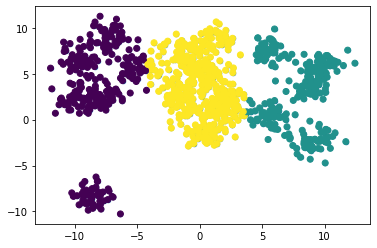

In [96]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=20,
                  random_state=0, cluster_std=0.90)
print(X.shape, y.shape)

plt.scatter(X[:, 0], X[:, 1], s=20);

from sklearn.cluster import KMeans
ktest = KMeans(n_clusters=3) #number of clusters to predict 3
ktest.fit(X) #fitting the model to X
y_pred = ktest.predict(X) #predicting labels (y) and saving to y_pred

#Plotting predicted labels as a scatter
plt.scatter(X[:,0], X[:,1], c=y_pred)

### Decision Tree Classifier


In [91]:
from sklearn.tree import DecisionTreeClassifier

DT_model= DecisionTreeClassifier()

# fit the model
DT_model.fit(X_train,y_train)

# model score
predict_train_DT = DT_model.predict(X_train)
predict_test_DT = DT_model.predict(X_test)

# accuracy score
DT_train_score = DT_model.score(X_train,y_train)
DT_test_score = DT_model.score(X_test,y_test)

# f1-score
DT_f1_score = metrics.f1_score(y_test, predict_test_DT, average = 'macro')

print('Accuracy on Train set',DT_train_score)
print('Accuracy on Test set',DT_test_score)
print('F1-score on Test set:',DT_f1_score)
print('\n')
print(metrics.classification_report(y_test, predict_test_DT))

Accuracy on Train set 0.9997192430793419
Accuracy on Test set 0.4541762201113659
F1-score on Test set: 0.3686189253349468


              precision    recall  f1-score   support

           0       0.58      0.56      0.57     16509
           1       0.38      0.39      0.39     10634
           2       0.14      0.16      0.15      3387

    accuracy                           0.45     30530
   macro avg       0.37      0.37      0.37     30530
weighted avg       0.46      0.45      0.46     30530



### Random Forest Classifier


In [92]:
from sklearn.ensemble import RandomForestClassifier

# create object model
RF_model = RandomForestClassifier()

# fit the model
RF_model.fit(X_train,y_train)

# model score
predict_train_RF = RF_model.predict(X_train)
predict_test_RF = RF_model.predict(X_test)

# accuracy score
RF_train_score = RF_model.score(X_train,y_train)
RF_test_score = RF_model.score(X_test,y_test)

# f1-score
RF_f1_score = metrics.f1_score(y_test,predict_test_RF, average = 'macro')

print('Accuracy on Train set',RF_train_score)
print('Accuracy on Test set',RF_test_score)
print('F1-score on Test set:',RF_f1_score)
print(metrics.classification_report(y_test,predict_test_RF))

Accuracy on Train set 0.9997192430793419
Accuracy on Test set 0.5582705535538814
F1-score on Test set: 0.3775204656616084
              precision    recall  f1-score   support

           0       0.60      0.80      0.69     16509
           1       0.45      0.36      0.40     10634
           2       0.28      0.02      0.05      3387

    accuracy                           0.56     30530
   macro avg       0.45      0.39      0.38     30530
weighted avg       0.52      0.56      0.52     30530



### Tuning Model


### Tuning Decision Tree

In [93]:
from sklearn.model_selection import GridSearchCV

#"""
parameters= {'max_depth':[7,10],
            'max_features':[2,4],
            'min_samples_split' : [90,100],
            'min_samples_leaf' : [20,30]}


DT = RandomForestClassifier()

DT_model_tune = GridSearchCV(DT, param_grid = parameters, cv=3)

DT_model_tune.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [2, 4],
                         'min_samples_leaf': [20, 30],
                         'min_samples_split': [90, 100]})

In [58]:
DT_model_tune.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 30,
 'min_samples_split': 90}

In [59]:
DT_model_tune= DecisionTreeClassifier(min_samples_split=90,min_samples_leaf= 20,
 max_features= 4,max_depth=10)

# fit the model
DT_model_tune.fit(X_train,y_train)

# model score
predict_train_DT = DT_model_tune.predict(X_train)
predict_test_DT = DT_model_tune.predict(X_test)

# accuracy score
DT_train_score = DT_model_tune.score(X_train,y_train)
DT_test_score = DT_model_tune.score(X_test,y_test)

# f1-score
DT_f1_score = metrics.f1_score(y_test, predict_test_DT, average = 'macro')
DT_recall = metrics.recall_score(y_test, predict_test_DT, average = 'macro')

print('Accuracy on Train set',DT_train_score)
print('Accuracy on Test set',DT_test_score)
print('F1-score on Test set:',DT_f1_score)
print('\n')
print(metrics.classification_report(y_test, predict_test_DT))

Accuracy on Train set 0.5767308664158571
Accuracy on Test set 0.5630854896822797
F1-score on Test set: 0.36070908242385197


              precision    recall  f1-score   support

           0       0.60      0.83      0.69     16509
           1       0.46      0.32      0.38     10634
           2       0.23      0.00      0.01      3387

    accuracy                           0.56     30530
   macro avg       0.43      0.39      0.36     30530
weighted avg       0.51      0.56      0.51     30530



In [60]:
from sklearn.model_selection import RandomizedSearchCV

# to get best parameters

# fine Tune the model using RandomizedSearchCV

#"""
parameters= {'n_estimators':[300,400],
            'max_depth':[6,7],
            'max_features':[2,4],
            'min_samples_split' : [100,150],
            'min_samples_leaf' : [30,40]}


rf = RandomForestClassifier()

rf_model_tune = RandomizedSearchCV(rf, param_distributions = parameters, cv=3,n_iter = 20, verbose=2, random_state=42)

rf_model_tune.fit(X_train,y_train)

#"""

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=7, max_features=4, min_samples_leaf=40, min_samples_split=100, n_estimators=400; total time=   7.8s
[CV] END max_depth=7, max_features=4, min_samples_leaf=40, min_samples_split=100, n_estimators=400; total time=   8.0s
[CV] END max_depth=7, max_features=4, min_samples_leaf=40, min_samples_split=100, n_estimators=400; total time=   8.3s
[CV] END max_depth=6, max_features=4, min_samples_leaf=40, min_samples_split=150, n_estimators=400; total time=   7.8s
[CV] END max_depth=6, max_features=4, min_samples_leaf=40, min_samples_split=150, n_estimators=400; total time=   8.2s
[CV] END max_depth=6, max_features=4, min_samples_leaf=40, min_samples_split=150, n_estimators=400; total time=   8.5s
[CV] END max_depth=7, max_features=4, min_samples_leaf=30, min_samples_split=100, n_estimators=300; total time=   6.4s
[CV] END max_depth=7, max_features=4, min_samples_leaf=30, min_samples_split=100, n_estimators=300; total 

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [6, 7],
                                        'max_features': [2, 4],
                                        'min_samples_leaf': [30, 40],
                                        'min_samples_split': [100, 150],
                                        'n_estimators': [300, 400]},
                   random_state=42, verbose=2)

### Tuning Random Forest 

In [61]:
# finding best parameters are iterative process

## n_estimators= 400,min_samples_split= 100,min_samples_leaf=30,max_features= 6,max_depth=11,bootstrap= False ## f1-score .228

# create object model
RF_model = RandomForestClassifier(n_estimators= 400,min_samples_split= 100,min_samples_leaf=30,max_features= 4,max_depth=7,bootstrap= False)

# fit the model
RF_model.fit(X_train,y_train)

# model score
predict_train_RF = RF_model.predict(X_train)
predict_test_RF = RF_model.predict(X_test)

# accuracy score
RF_train_score = RF_model.score(X_train,y_train)
RF_test_score = RF_model.score(X_test,y_test)

# f1-score
RF_f1_score = metrics.f1_score(y_test,predict_test_RF, average = 'macro')
RF_recall = metrics.recall_score(y_test,predict_test_RF, average = 'macro')
print('Accuracy on Train set',RF_train_score)
print('Accuracy on Test set',RF_test_score)
print('F1-score on Test set:',RF_f1_score)
print(metrics.classification_report(y_test,predict_test_RF))

Accuracy on Train set 0.5778398562524566
Accuracy on Test set 0.5740583033082214
F1-score on Test set: 0.3513343009868423
              precision    recall  f1-score   support

           0       0.59      0.89      0.71     16509
           1       0.50      0.26      0.34     10634
           2       0.00      0.00      0.00      3387

    accuracy                           0.57     30530
   macro avg       0.36      0.38      0.35     30530
weighted avg       0.49      0.57      0.50     30530



C:\Users\Leeza A. Santos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leeza A. Santos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leeza A. Santos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
model_compare = pd.DataFrame({
    
'Models':['Desicion Tree','RandomForestClassifier','LogisticRegression','LinearDiscriminantAnalysis','Naive_Bayes'],
'f1_score':[DT_f1_score, RF_f1_score, LR_f1_score, LDA_f1_score, NB_f1_score],
'recall':[DT_recall, RF_recall, LR_recall, LDA_recall, NB_recall],
'Accuracy on train set':[DT_train_score,RF_train_score,LR_train_score,LDA_train_score,NB_train_score],
'Accuracy on test set':[DT_test_score, RF_test_score,LR_test_score,LDA_test_score,NB_test_score]

})

model_compare = model_compare.sort_values('recall',ascending=False)

In [63]:
# print out comparison in 'Blues' or 'Greens' or 'Greys'
model_compare.style.background_gradient(cmap='Blues')

,Models,f1_score,recall,Accuracy on train set,Accuracy on test set
4,Naive_Bayes,0.373745,0.392296,0.550943,0.554340
0,Desicion Tree,0.360709,0.386404,0.576731,0.563085
1,RandomForestClassifier,0.351334,0.384856,0.577840,0.574058
3,LinearDiscriminantAnalysis,0.351712,0.382029,0.563170,0.565837
2,LogisticRegression,0.346971,0.380855,0.568196,0.569931
